In [7]:
# Загрузка и обработка базы данных для дальнейшего анализа

from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
Base = read_csv("Dougherty_data_18.csv",  header=0, sep=';',  decimal=',', na_values='?')
Base

,ASVAB01,ASVAB02,ASVAB03,ASVAB04,ASVAB05,ASVAB06,ASVABC,HEIGHT,WEIGHT85,WEIGHT02,...,EDUCHSD,EDUCDO,SINGLE,MARRIED,DIVORCED,FAITHN,FAITHP,FAITHC,FAITHJ,FAITHO
0,25,34,31,22,26,34,30.25,70.0,145,204,...,1,0,0,1,0,0,0,0,0,1
1,56,43,48,47,52,59,45.25,71.0,136,178,...,1,0,1,0,0,0,0,1,0,0
2,53,49,49,51,38,42,49.50,70.0,169,196,...,1,0,0,1,0,0,1,0,0,0
3,57,37,43,39,34,30,39.00,70.0,166,182,...,1,0,0,1,0,0,1,0,0,0
4,57,51,59,53,41,45,53.50,70.0,175,222,...,1,0,0,1,0,0,0,1,0,0
5,39,39,41,30,40,40,37.25,75.0,166,175,...,1,0,0,1,0,0,0,1,0,0
6,53,38,41,35,29,38,38.00,74.0,171,210,...,1,0,0,1,0,0,1,0,0,0
7,55,49,55,51,46,34,51.00,74.0,241,271,...,0,0,0,1,0,0,0,1,0,0
8,53,48,57,61,54,47,53.50,63.0,141,155,...,1,0,0,1,0,0,1,0,0,0
9,52,56,56,52,49,41,55.00,69.0,216,230,...,1,0,0,1,0,0,0,1,0,0


In [8]:
# Вывод первые 3 строки таблицы данных с названиями столбцов

Base.head(3)

,ASVAB01,ASVAB02,ASVAB03,ASVAB04,ASVAB05,ASVAB06,ASVABC,HEIGHT,WEIGHT85,WEIGHT02,...,EDUCHSD,EDUCDO,SINGLE,MARRIED,DIVORCED,FAITHN,FAITHP,FAITHC,FAITHJ,FAITHO
0,25,34,31,22,26,34,30.25,70.0,145,204,...,1,0,0,1,0,0,0,0,0,1
1,56,43,48,47,52,59,45.25,71.0,136,178,...,1,0,1,0,0,0,0,1,0,0
2,53,49,49,51,38,42,49.50,70.0,169,196,...,1,0,0,1,0,0,1,0,0,0


In [9]:
# Вывод обобщенной информации по числовым данным (кол-во ответов, среднее, границы квартилей и т. д.)

Base.describe()

,ASVAB01,ASVAB02,ASVAB03,ASVAB04,ASVAB05,ASVAB06,ASVABC,HEIGHT,WEIGHT85,WEIGHT02,...,EDUCHSD,EDUCDO,SINGLE,MARRIED,DIVORCED,FAITHN,FAITHP,FAITHC,FAITHJ,FAITHO
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,536.000000,534.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,50.575926,50.714815,50.359259,50.696296,50.675926,50.266667,50.610075,67.314607,154.131481,180.103704,...,0.533333,0.090741,0.118519,0.655556,0.225926,0.040741,0.525926,0.335185,0.011111,0.087037
std,9.569964,9.525679,9.073428,9.260224,8.982181,9.254553,8.368793,4.105811,34.277046,42.780498,...,0.499350,0.287506,0.323521,0.475627,0.418578,0.197872,0.499790,0.472493,0.104919,0.282151
min,21.000000,30.000000,22.000000,20.000000,20.000000,24.000000,29.500000,58.000000,86.000000,86.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,43.000000,45.000000,46.000000,45.000000,44.000000,44.687500,64.000000,128.000000,146.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,50.500000,53.000000,53.000000,52.000000,50.500000,52.000000,67.000000,150.000000,176.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,57.000000,59.000000,58.000000,58.000000,58.000000,57.000000,57.000000,70.000000,175.000000,206.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,69.000000,67.000000,62.000000,63.000000,63.000000,72.000000,64.250000,78.000000,296.000000,400.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Вывод количества заполненных (непропущенных) значений

Base.count(axis=0)

ASVAB01     540
ASVAB02     540
ASVAB03     540
ASVAB04     540
ASVAB05     540
ASVAB06     540
ASVABC      536
HEIGHT      534
WEIGHT85    540
WEIGHT02    540
W_EXP       535
EARNINGS    534
HOURS       536
SM          540
SF          540
SIBLINGS    540
LIBRARY     540
POV78       514
TENURE      540
COLLBARG    540
CATGOV      540
CATPRI      540
CATSE       540
URBAN       540
REGNE       540
REGNC       540
REGW        540
REGS        540
idd         540
FEMALE      540
MALE        540
ETHBLACK    540
ETHHISP     540
ETHWHITE    540
AGE         540
S           540
EDUCPROF    540
EDUCPHD     540
EDUCMAST    540
EDUCBA      540
EDUCAA      540
EDUCHSD     540
EDUCDO      540
SINGLE      540
MARRIED     540
DIVORCED    540
FAITHN      540
FAITHP      540
FAITHC      540
FAITHJ      540
FAITHO      540
dtype: int64

In [11]:
# Заполнение пропуски медианными значениями

Base1 = Base.fillna(Base.median(axis=0), axis=0)
Base1

,ASVAB01,ASVAB02,ASVAB03,ASVAB04,ASVAB05,ASVAB06,ASVABC,HEIGHT,WEIGHT85,WEIGHT02,...,EDUCHSD,EDUCDO,SINGLE,MARRIED,DIVORCED,FAITHN,FAITHP,FAITHC,FAITHJ,FAITHO
0,25,34,31,22,26,34,30.25,70.0,145,204,...,1,0,0,1,0,0,0,0,0,1
1,56,43,48,47,52,59,45.25,71.0,136,178,...,1,0,1,0,0,0,0,1,0,0
2,53,49,49,51,38,42,49.50,70.0,169,196,...,1,0,0,1,0,0,1,0,0,0
3,57,37,43,39,34,30,39.00,70.0,166,182,...,1,0,0,1,0,0,1,0,0,0
4,57,51,59,53,41,45,53.50,70.0,175,222,...,1,0,0,1,0,0,0,1,0,0
5,39,39,41,30,40,40,37.25,75.0,166,175,...,1,0,0,1,0,0,0,1,0,0
6,53,38,41,35,29,38,38.00,74.0,171,210,...,1,0,0,1,0,0,1,0,0,0
7,55,49,55,51,46,34,51.00,74.0,241,271,...,0,0,0,1,0,0,0,1,0,0
8,53,48,57,61,54,47,53.50,63.0,141,155,...,1,0,0,1,0,0,1,0,0,0
9,52,56,56,52,49,41,55.00,69.0,216,230,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
# Далее приступаем к построению графиков. 
# Перед этим, рассмотрим описание необходимых для построения графиков переменных.
# Все представленные ниже переменные являются интервальными.

# ASVABC – Composite of ASVAB2 (with double weight), ASVAB3 and ASVAB4
# ASVAB2 – Arithmetic reasoning
# ASVAB3 – Word knowledge
# ASVAB4 – Paragraph comprehension
# HEIGHT – Height, in inches, in 1985
# WEIGHT85 – Weight, in pounds, in 1985
# WEIGHT02 – Weight, in pounds, in 2002
# EARNINGS – Current hourly earnings in $ reported at the 2002 interview
# S – Years of schooling (highest grade completed as of 2002)
# EXP – Total out-of-school work experience (years) as of the 2002 interview.

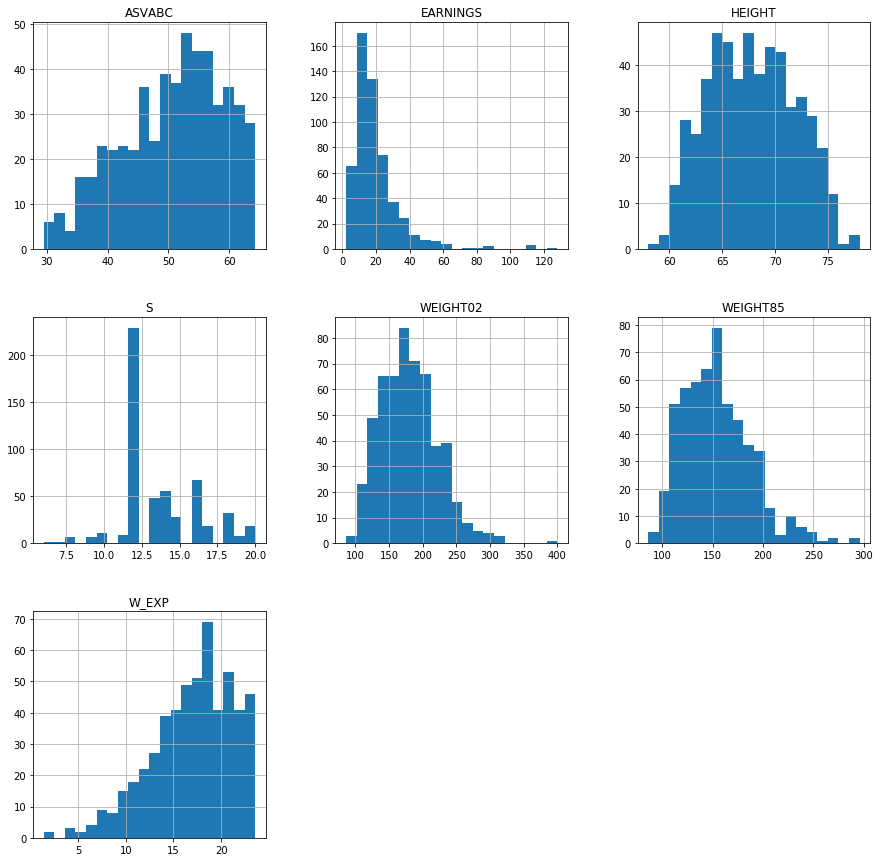

In [261]:
# Гистограммы в виде столбиков для указанных переменных

import numpy as np
from matplotlib import pyplot
from pandas import read_csv
task_g_list = ["ASVABC", "HEIGHT", "WEIGHT85", "WEIGHT02", "W_EXP", "EARNINGS", "S"]
Base1[task_g_list].hist(figsize=(15,15), bins=20)
pyplot.show()

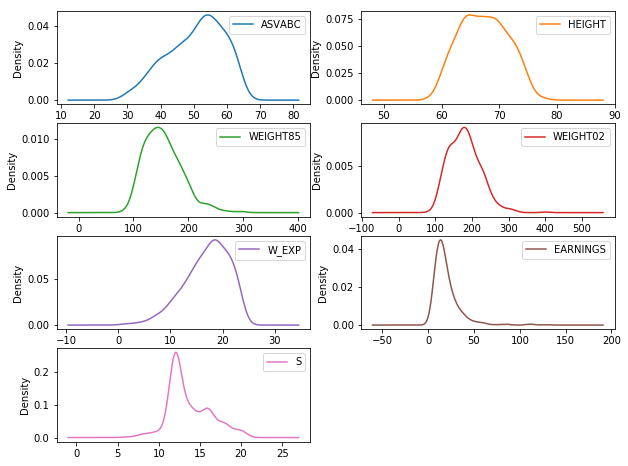

In [263]:
# Гистограммы в виде кривых линий

import numpy as np
from matplotlib import pyplot
from pandas import read_csv
task_g_list = ["ASVABC", "HEIGHT", "WEIGHT85", "WEIGHT02", "W_EXP", "EARNINGS", "S"]
Base1[task_g_list].plot(kind="density", subplots=True, layout=(5,2), figsize=(10,10), sharex=False, )
pyplot.show()

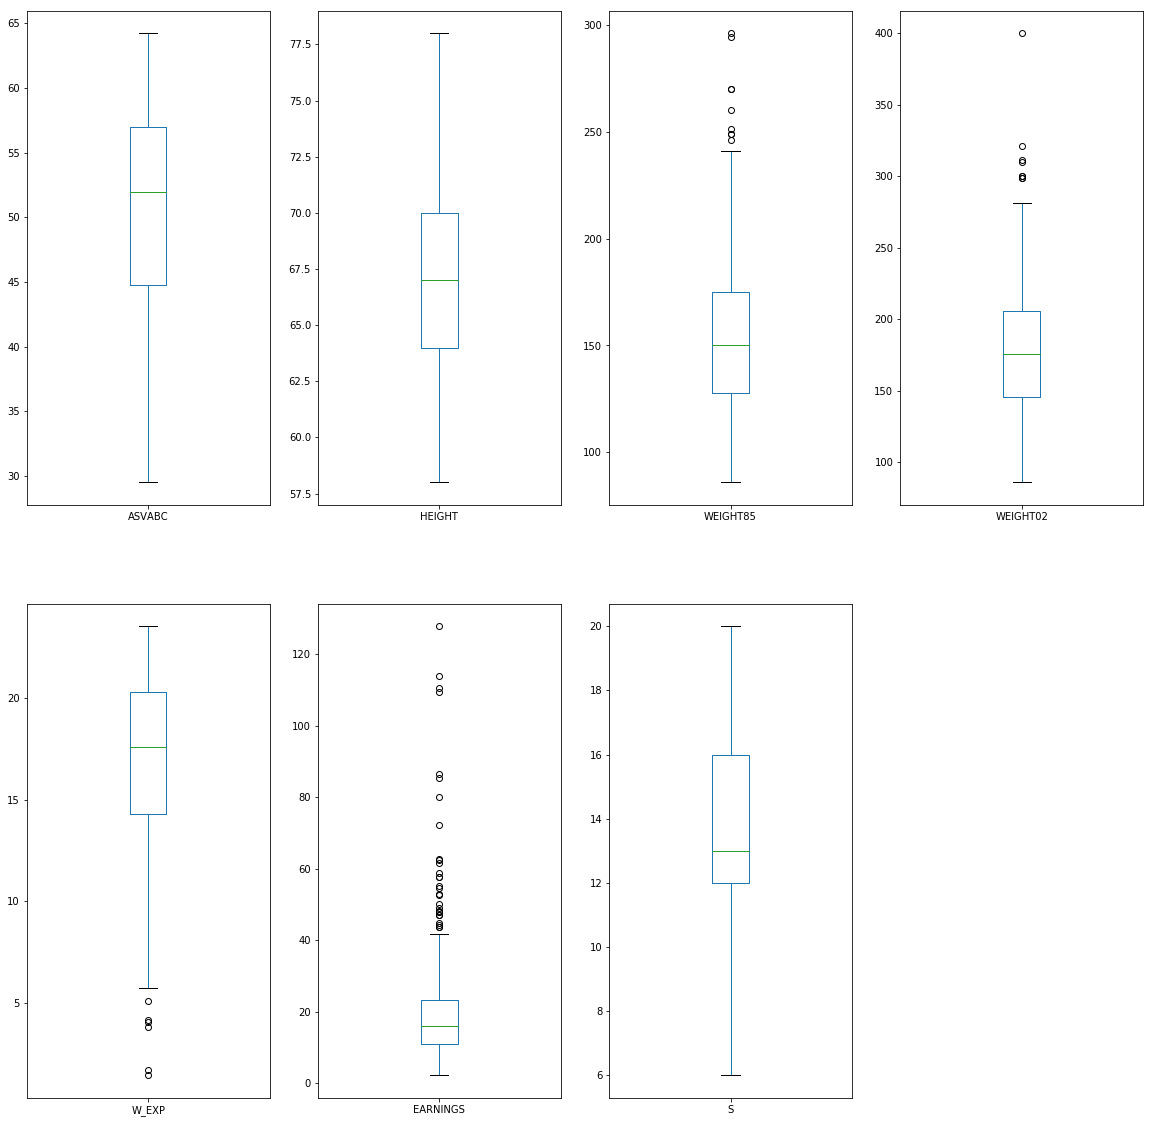

In [257]:
# Графики "ящики с усами"

import numpy as np
from matplotlib import pyplot
from pandas import read_csv
Base1[task_g_list].plot(kind="box", subplots=True, layout=(2,4), figsize=(20,20), sharex=False, sharey=False)
pyplot.show()

In [93]:
# Числовая корреляционная матрица

Base1[task_g_list].corr()

,ASVABC,HEIGHT,WEIGHT85,WEIGHT02,W_EXP,EARNINGS,S
ASVABC,1.000000,0.173193,0.041092,0.030380,0.013954,0.346934,0.531289
HEIGHT,0.173193,1.000000,0.624813,0.554020,0.128425,0.215101,0.065792
WEIGHT85,0.041092,0.624813,1.000000,0.804568,0.132087,0.096353,-0.027779
WEIGHT02,0.030380,0.554020,0.804568,1.000000,0.094812,0.051481,-0.043126
W_EXP,0.013954,0.128425,0.132087,0.094812,1.000000,0.027727,-0.299801
EARNINGS,0.346934,0.215101,0.096353,0.051481,0.027727,1.000000,0.412022
S,0.531289,0.065792,-0.027779,-0.043126,-0.299801,0.412022,1.000000


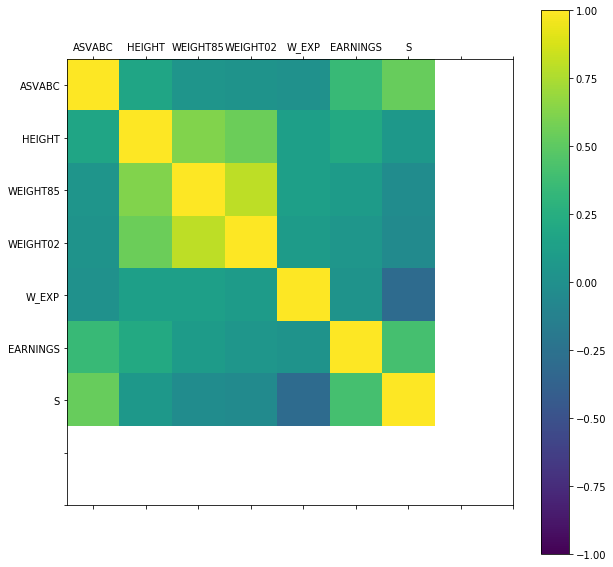

In [33]:
# Цветная корреляционная матрица

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import numpy
names=task_g_list
correlations=Base1[task_g_list].corr()
fig = pyplot.figure(figsize=(10,10))
ax=fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks=numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [ ]:
# Далее построены диаграммы рассеяния для ряда пар характеристик.
# Пары были выбраны с целью проанализировать то, как разные характеристик могут зависить в отличие от уровня заработка

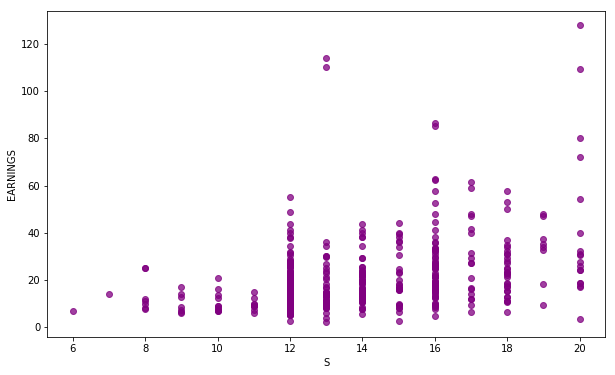

In [346]:
# Диаграмма рассеяния для пары EARNINGS и S

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
col1='S'
col2='EARNINGS'

plt.figure(figsize=(10, 6))

plt.scatter(Base1[col1],
            Base1[col2],
            alpha=0.75,
            color='purple')

plt.xlabel(col1)
plt.ylabel(col2);

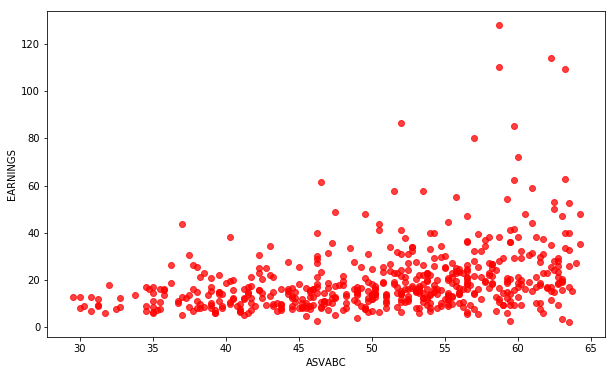

In [132]:
# Диаграмма рассеяния для пары EARNINGS и ASVABC

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
col1='ASVABC'
col2='EARNINGS'

plt.figure(figsize=(10, 6))

plt.scatter(Base1[col1],
            Base1[col2],
            alpha=0.75,
            color='red')

plt.xlabel(col1)
plt.ylabel(col2);

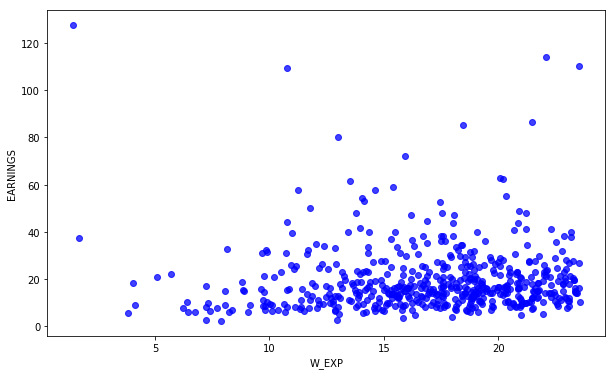

In [347]:
# Диаграмма рассеяния для пары EARNINGS и W_EXP

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
col1='W_EXP'
col2='EARNINGS'

plt.figure(figsize=(10, 6))

plt.scatter(Base1[col1],
            Base1[col2],
            alpha=0.75,
            color='blue')

plt.xlabel(col1)
plt.ylabel(col2);

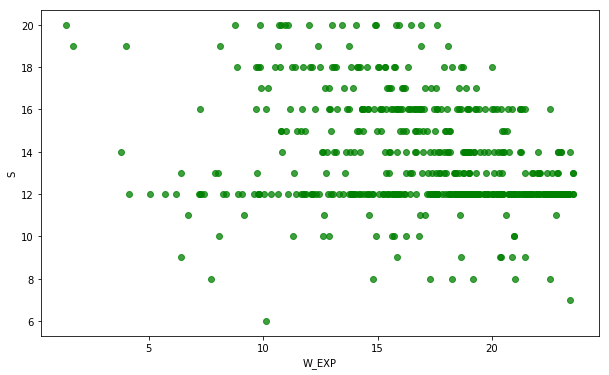

In [349]:
# Диаграмма рассеяния для пары S и W_EXP

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
col1='W_EXP'
col2='S'

plt.figure(figsize=(10, 6))

plt.scatter(Base1[col1],
            Base1[col2],
            alpha=0.75,
            color='green')

plt.xlabel(col1)
plt.ylabel(col2);

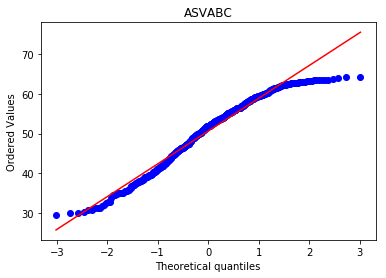

In [124]:
# QQ-график для переменной ASVABC

from matplotlib import pyplot
import numpy as np 
import pylab 
import scipy.stats as stats
%matplotlib inline
measurement1=Base1['ASVABC']
stats.probplot(measurement1, dist="norm", plot=pylab)
plt.title('QQ-plot for ASVABC')
pylab.show()

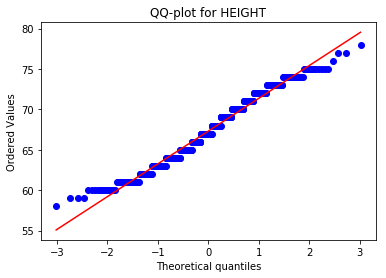

In [264]:
# QQ-график для переменной HEIGHT

from matplotlib import pyplot
import numpy as np 
import pylab 
import scipy.stats as stats
%matplotlib inline
measurement2=Base1['HEIGHT']
stats.probplot(measurement2, dist="norm", plot=pylab)
plt.title('QQ-plot for HEIGHT')
pylab.show()

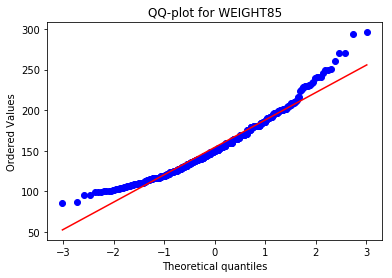

In [265]:
# QQ-график для переменной WEIGHT85

from matplotlib import pyplot
import numpy as np 
import pylab 
import scipy.stats as stats
%matplotlib inline
measurement3=Base1['WEIGHT85']
stats.probplot(measurement3, dist="norm", plot=pylab)
plt.title('QQ-plot for WEIGHT85')
pylab.show()

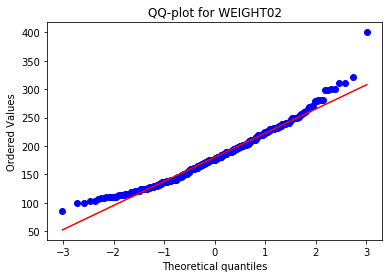

In [267]:
# QQ-график для переменной WEIGHT02

from matplotlib import pyplot
import numpy as np 
import pylab 
import scipy.stats as stats
%matplotlib inline
measurement4=Base1['WEIGHT02']
stats.probplot(measurement4, dist="norm", plot=pylab)
plt.title('QQ-plot for WEIGHT02')
pylab.show()

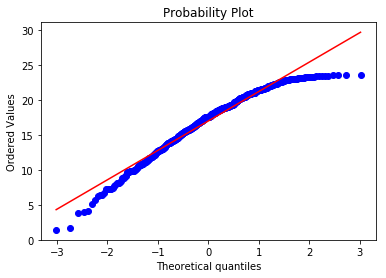

In [120]:
# QQ-график для переменной W_EXP

from matplotlib import pyplot
import numpy as np 
import pylab 
import scipy.stats as stats
%matplotlib inline
measurement5=Base1['W_EXP']
stats.probplot(measurement5, dist="norm", plot=pylab)
plt.title('QQ-plot for W_EXP')
pylab.show()

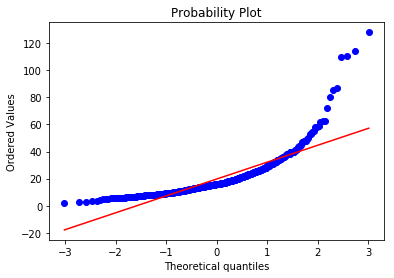

In [121]:
# QQ-график для переменной EARNINGS

from matplotlib import pyplot
import numpy as np 
import pylab 
import scipy.stats as stats
%matplotlib inline
measurement6=Base1['EARNINGS']
stats.probplot(measurement6, dist="norm", plot=pylab)
plt.title('QQ-plot for EARNINGS')
pylab.show()

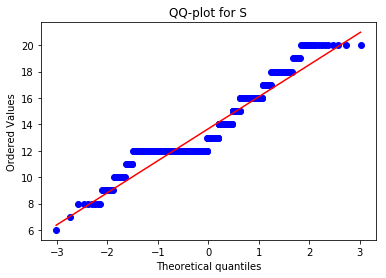

In [125]:
# QQ-график для переменной S

from matplotlib import pyplot
import numpy as np 
import pylab 
import scipy.stats as stats
%matplotlib inline
measurement7=Base1['S']
stats.probplot(measurement7, dist="norm", plot=pylab)
plt.title('QQ-plot for S')
pylab.show()

In [ ]:
# Далее, будут строиться столбиковые и круговые диаграммы для следующих переменных

# Ethnicity:
# ETHBLACK – Black
# ETHHISP – Hispanic
# ETHWHITE – Non-black, non-hispanic

# Marital status:
# SINGLE – Single, never married
# MARRIED – Married, spouse present
# DIVORCED – Divorced or separated

# Faith:
# FAITHN – None
# FAITHC – Catholic
# FAITHJ – Jewish
# FAITHP – Protestant
# FAITHO – Other

In [ ]:
# Прежде всего, необходимо посчитать распределение людей по расовой принадлежности в данной части базы данных

In [209]:
White = Base1['ETHWHITE']
White.value_counts()

1    467
0     73
Name: ETHWHITE, dtype: int64

In [210]:
Black = Base1['ETHBLACK']
Black.value_counts()

0    501
1     39
Name: ETHBLACK, dtype: int64

In [211]:
Hispanic = Base1['ETHHISP']
Hispanic.value_counts()

0    506
1     34
Name: ETHHISP, dtype: int64

In [213]:
# Распределение людей по рассовой принадлежности

Race_names = ['White', 'Black', 'Hispanic']
Race_amount = [467, 39, 35]

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


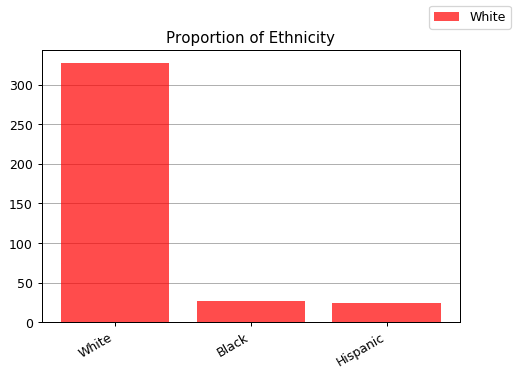

In [315]:
# Столбиковая диаграмма по признаку расовой принадлежности

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

Race_names = ['White', 'Black', 'Hispanic']
Race_amount = [467, 39, 35]

dpi = 90
fig = plt.figure(dpi = dpi, figsize = (540 / dpi, 400 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.title('Proportion of Ethnicity')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

xs = range(len(Race_names))

plt.bar([x + 0.5 for x in xs], [ d * 0.7 for d in Race_amount],
        width = 0.8, alpha = 0.7,
        zorder = 3, color="red")

plt.xticks([x + 0.5 for x in xs], Race_names)


fig.autofmt_xdate(rotation = 30)

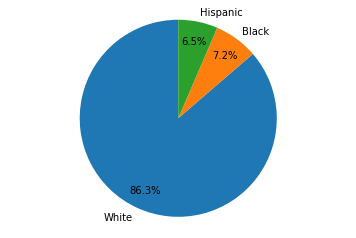

In [340]:
# Круговая диаграмма по признаку расовой принадлежности

import matplotlib.pyplot as plt

labels = 'White', 'Black', 'Hispanic'
sizes = [467, 39, 35]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90,  pctdistance=0.8)
ax1.axis('equal')

plt.show()

In [229]:
# Расчеты распределения людей по статусу семейного положения

Single = Base1['SINGLE']
Married = Base1['MARRIED']
Divorced = Base1['DIVORCED']

In [237]:
Single.value_counts()

0    476
1     64
Name: SINGLE, dtype: int64

In [231]:
Married.value_counts()

1    354
0    186
Name: MARRIED, dtype: int64

In [232]:
Divorced.value_counts()

0    418
1    122
Name: DIVORCED, dtype: int64

In [213]:
# Распределение людей по статусу семейного положения

Marriage_names = ['Single', 'Married', 'Divorced']
Marriage_amount = [64, 186, 122]

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


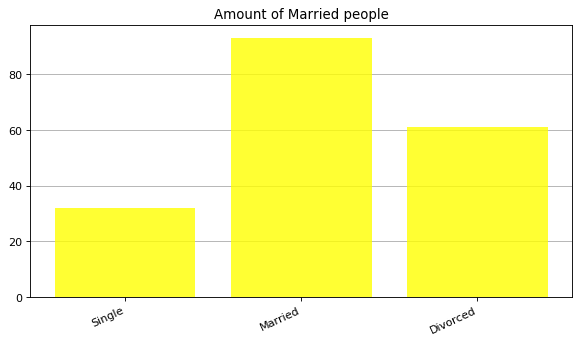

In [342]:
# Столбиковая диаграмма по признаку статуса семейного положения

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

Marriage_names = ['Single', 'Married', 'Divorced']
Marriage_amount = [64, 186, 122]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (700 / dpi, 400 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.title('Amount of Married people')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

xs = range(len(Marriage_names))

plt.bar([x + 0.5 for x in xs], [ d * 0.5 for d in Marriage_amount],
        width = 0.8, alpha = 0.8,
        zorder = 3, color='yellow')

plt.xticks([x + 0.5 for x in xs], Marriage_names)

fig.autofmt_xdate(rotation = 25)

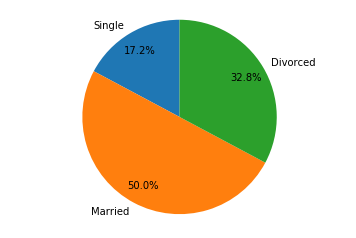

In [337]:
# Круговая диаграмма по признаку статуса семейного положения

import matplotlib.pyplot as plt

labels = 'Single', 'Married', 'Divorced'
sizes = [64, 186, 122]
explode = (0, 0, 0)


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90,  pctdistance=0.8)
ax1.axis('equal')

plt.show()

In [239]:
# Расчеты распределения людей по религии

Atheism = Base1['FAITHN']
Catholic = Base1['FAITHP']
Jewish = Base1['FAITHC']
Protestant = Base1['FAITHJ']
Others = Base1['FAITHO']

In [240]:
Atheism.value_counts()

0    518
1     22
Name: FAITHN, dtype: int64

In [241]:
Catholic.value_counts()

1    284
0    256
Name: FAITHP, dtype: int64

In [242]:
Jewish.value_counts()

0    359
1    181
Name: FAITHC, dtype: int64

In [243]:
Protestant.value_counts()

0    534
1      6
Name: FAITHJ, dtype: int64

In [244]:
Others.value_counts()

0    493
1     47
Name: FAITHO, dtype: int64

In [213]:
# Распределение людей по статусу религии

Religion_names = ['Atheism', 'Catholic', 'Jewish', 'Protestant', 'Others']
Religion_amount = [22, 284, 181, 6, 47]

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


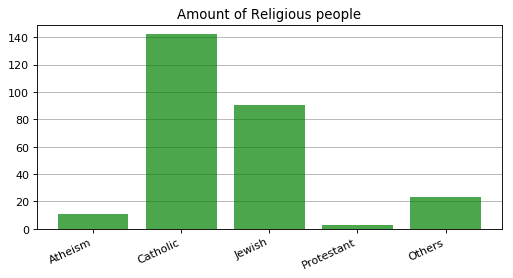

In [345]:
# Столбиковая диаграмма по признаку религии

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import csv

Religion_names = ['Atheism', 'Catholic', 'Jewish', 'Protestant', 'Others']
Religion_amount = [22, 284, 181, 6, 47]

dpi = 80
fig = plt.figure(dpi = dpi, figsize = (600 / dpi, 300 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.title('Amount of Religious people')

ax = plt.axes()
ax.yaxis.grid(True, zorder = 1)

xs = range(len(Religion_names))

plt.bar([x + 0.5 for x in xs], [ d * 0.5 for d in Religion_amount],
        width = 0.8, alpha = 0.7,
        zorder = 3, color="green")

plt.xticks([x + 0.5 for x in xs], Religion_names)

fig.autofmt_xdate(rotation = 25)

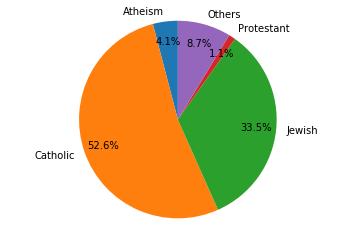

In [336]:
# Круговая диаграмма по признаку религии

import matplotlib.pyplot as plt

labels = 'Atheism', 'Catholic', 'Jewish', 'Protestant', 'Others'
sizes = [22, 284, 181, 6, 47]
explode = (0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, pctdistance=0.8)
ax1.axis('equal')

plt.show()

In [ ]:
# Интерпретация о распределении и зависимостях между переменных представлены в отчете